In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

In [29]:
data = pd.read_csv('data/final_data.csv')
data.dropna(inplace = True)
data.head()

,Tm,Year,PTS_1,VORP_1,PER_1,WS_1,PTS_2,VORP_2,PER_2,WS_2,...,NRtg_2,SRS_2,WinLoss_1,NRtg_1,SRS_1,Rest,B2B,distLB,distUB,WinLoss
0,BOS,1984,0.691282,1.306881,0.415070,1.050208,0.931111,1.223837,0.082140,0.793457,...,1.560378,1.631836,0.683,1.120777,1.170642,1.244913,-0.368426,-0.359567,0.043129,0.756
1,NJN,1984,-0.704902,-0.408742,-1.024888,-0.549483,-0.370323,-0.862499,-1.121805,-1.075314,...,0.168776,0.223381,0.598,0.581578,0.607197,1.244913,-0.881990,-0.736498,-0.606690,0.549
2,NYK,1984,-0.985729,-0.562171,-0.828808,-0.560477,0.295417,-0.436011,-0.828391,-0.473870,...,-0.661303,-0.552811,0.537,0.519363,0.565542,-0.544649,0.401919,-0.657416,-0.641871,0.573
3,PHI,1984,0.803246,1.641637,0.669361,1.462499,1.852632,2.952845,1.327730,2.142409,...,1.389480,1.475055,0.793,1.597761,1.650775,1.244913,0.401919,-1.004836,-0.809547,0.634
4,WSB,1984,0.400665,2.060082,2.424884,2.451998,-0.118101,0.232539,0.409628,0.518512,...,0.217604,0.272215,0.512,-0.019837,0.043753,-0.544649,0.145138,-1.147874,-0.891759,0.427


In [3]:
train = data.copy()[data['Year'] <= 2013]
test = data.copy()[data['Year'] > 2013]

In [30]:
X_train, y_train = train.drop(columns = ['Tm', 'Year', 'WinLoss']), train['WinLoss']
X_test, y_test = test.drop(columns = ['Tm', 'Year', 'WinLoss']), test['WinLoss']

In [65]:
reg = ElasticNet(alpha = 0.01, l1_ratio = 0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
1 - sum((y_pred - y_test) ** 2) / sum((0.5 - y_test) ** 2)

0.44262768044761747

/Users/martinbogaert/anaconda3/envs/nbaenv/lib/python3.10/site-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/martinbogaert/anaconda3/envs/nbaenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/martinbogaert/anaconda3/envs/nbaenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.207e+00, tolerance: 1.803e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

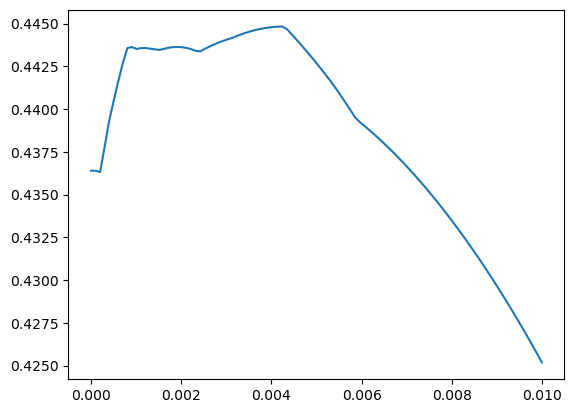

In [52]:
alphas = np.linspace(0, 0.01, 100)
r2s, maes = [], []
for alpha in alphas :
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    r2 = 1 - sum((y_pred - y_test) ** 2) / sum((0.5 - y_test) ** 2)
    mae = (np.abs(y_pred - y_test)).mean()
    r2s.append(r2)
    maes.append(mae)
plt.plot(alphas, r2s)

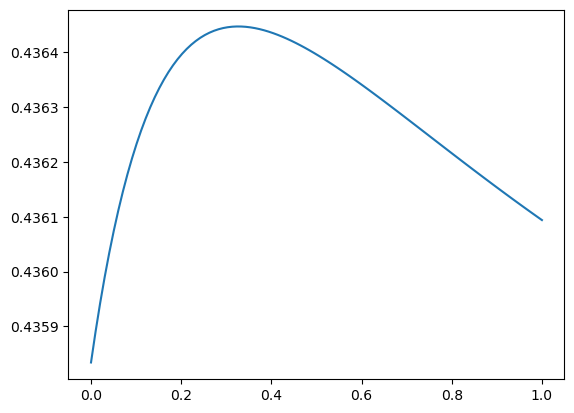

In [54]:
alphas = np.linspace(0, 1, 100)
r2s, maes = [], []
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    r2 = 1 - sum((y_pred - y_test) ** 2) / sum((0.5 - y_test) ** 2)
    mae = (np.abs(y_pred - y_test)).mean()
    r2s.append(r2)
    maes.append(mae)
plt.plot(alphas, r2s)

/Users/martinbogaert/anaconda3/envs/nbaenv/lib/python3.10/site-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/martinbogaert/anaconda3/envs/nbaenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/martinbogaert/anaconda3/envs/nbaenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.207e+00, tolerance: 1.803e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

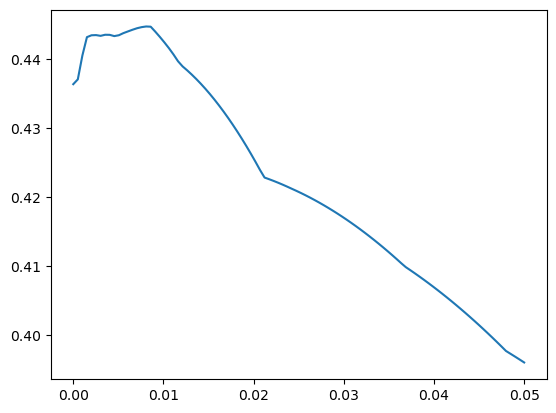

In [63]:
alphas = np.linspace(0, 0.05, 100)
r2s, maes = [], []
for alpha in alphas :
    ridge = ElasticNet(alpha = alpha, l1_ratio = 0.5)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    r2 = 1 - sum((y_pred - y_test) ** 2) / sum((0.5 - y_test) ** 2)
    mae = (np.abs(y_pred - y_test)).mean()
    r2s.append(r2)
    maes.append(mae)
plt.plot(alphas, r2s)

In [66]:
test['Pred'] = y_pred
pred_df = test.copy()[['Year', 'Tm', 'WinLoss', 'Pred']].rename(columns = {'WinLoss': 'Real'})
pred_df['Real'] = round(pred_df['Real'] * 82)
pred_df['Pred'] = pred_df['Pred'] * 82

In [67]:
pred_df.to_csv('data/pred_test_ElasticNet.csv', index = None)

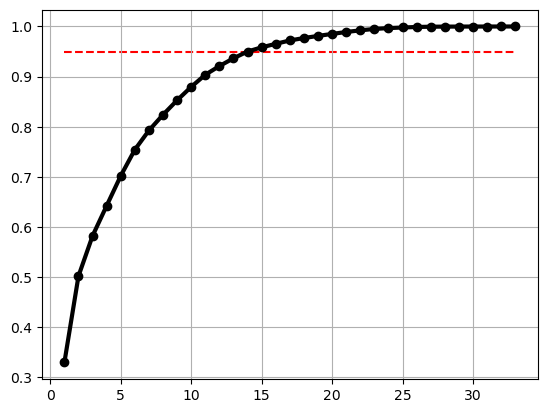

In [118]:
pca = PCA()
pca.fit(X_train)
ks = np.arange(1, X_train.shape[1] + 1)
plt.plot(ks, np.cumsum(pca.explained_variance_ratio_), 'k-o', linewidth = 3)
plt.plot([1, X_train.shape[1]], [.95, .95], zorder = -1, linestyle = '--', c = 'red')
plt.grid()
plt.show()

In [122]:
R2, MAE = [], []
for k in ks :
    X_train_norm = pca.transform(X_train)[:,:k]
    X_test_norm = pca.transform(X_test)[:,:k]

    reg = LinearRegression()
    reg.fit(X_train_norm, y_train)
    y_pred = reg.predict(X_test_norm)
    R2.append(r2_score(y_test, y_pred))
    MAE.append(np.abs(y_test - y_pred).mean())

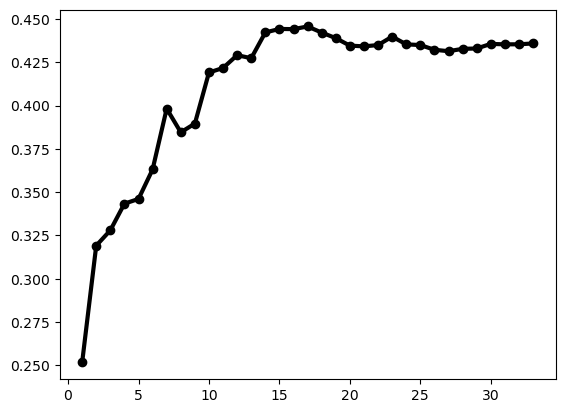

In [126]:
plt.plot(ks, R2, 'k-o', linewidth = 3)

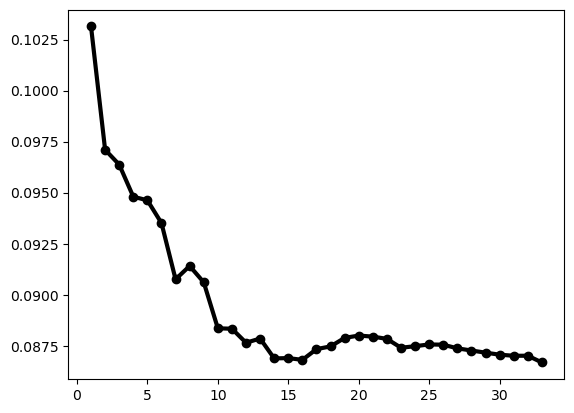

In [124]:
plt.plot(ks, MAE, 'k-o', linewidth = 3)
# There seems to be a only a slight edge at around 15 principal components

In [133]:
pca_15 = PCA(n_components = 15)
X_norm = pca_15.fit_transform(X_train)
X_test_norm = pca_15.transform(X_test)
reg_pca = LinearRegression()
reg_pca.fit(X_norm, y_train)
y_pred = reg_pca.predict(X_test_norm)

In [134]:
pred_df = test.copy()[['Year', 'Tm', 'WinLoss', 'Pred']].rename(columns = {'WinLoss': 'Real'})
pred_df['Pred'] = y_pred
pred_df['Real'] = round(pred_df['Real'] * 82)
pred_df['Pred'] = pred_df['Pred'] * 82

In [136]:
pred_df.to_csv('data/pred_test_LR_PCA.csv', index = None)